# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 24th, 23:00 h** 

In [81]:
# All the imports that we use
from skimage import io, img_as_float
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA

from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import match_template
from skimage.transform import rotate

from skimage.feature import ORB
from skimage.feature import CENSURE
from skimage.feature import match_descriptors
from skimage.feature import plot_matches

from skimage.transform import rescale

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (person) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

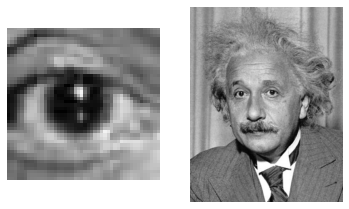

In [2]:
# Show the original image and the template image
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

1.1. Create a function for template matching applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

In [3]:
# Function that will show n images in a row
def show_images(images, titles):
    # Create the struct
    fig, ax = plt.subplots(1, len(images), figsize=(15,15))
    
    for i in range(len(images)):
        # Adding original image
        ax[i].imshow(images[i], cmap='gray')
        # Adding title
        ax[i].set_title(titles[i])    
        # Removing axis
        ax[i].axis('off')
    
    # Show the result
    plt.show()
    
# Function that will apply a filter to match an image with a template.
def euclidean_distance(image, match, threshold = 5):
    # Passing to float
    image = img_as_float(image)
    match = img_as_float(match)

    # Calculate the dimensions of the result image
    res_dim = []
    res_dim.append(image.shape[0] - match.shape[0])
    res_dim.append(image.shape[1] - match.shape[1])
    
    # Create the result image with all zeros
    res = np.zeros(res_dim)
    
    # Iterate each value
    for i in range(res_dim[0]):
        for j in range(res_dim[1]):            
            # Apply the filter
            filter_range = image[i:i + match.shape[0], j: j + match.shape[1]] - match
            # Apply np norm to get the value
            res[i][j] = LA.norm(filter_range)    
    
    # Returns the resulting image and the binarized image
    return res , res < threshold

# Function that will apply cross correlation from scikit image
def cross_correlation(image, match, threshold = .5):
    # Passing to float
    image = img_as_float(image)
    match = img_as_float(match)
    # Call the function
    res = match_template(image, match)
    # Returns the resulting image and the binarized image
    return res, res > threshold

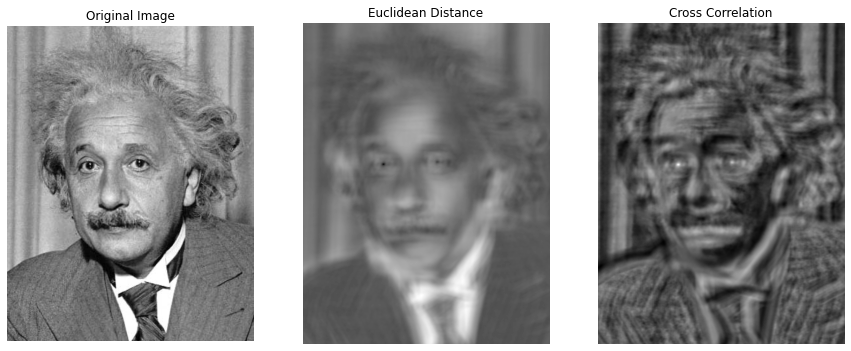

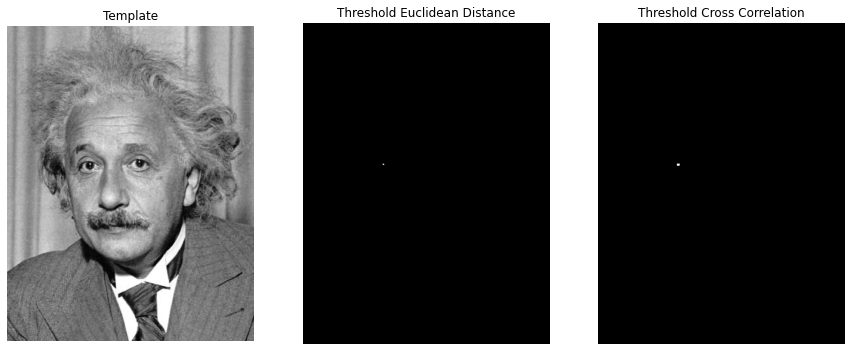

In [41]:
%matplotlib inline

# Passing eyes to graylevels
eye=io.imread('./images/eye.png')
eye = rgb2gray(rgba2rgb(eye))

# Passing original image to graylevels
einstein=io.imread('./images/einstein.png')
einstein = rgb2gray(rgba2rgb(einstein))

# Get Euclidean and Cross Correlation result
euclidean, th_eucl = euclidean_distance(einstein, eye)
cross, th_cross = cross_correlation(einstein, eye, .65)

# Printing
images = [einstein, euclidean, cross]
titles = ['Original Image', 'Euclidean Distance', 'Cross Correlation']

show_images(images, titles)

images = [einstein, th_eucl, th_cross]
titles = ['Template', 'Threshold Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

<ipython-input-17-aab1edf0f0dc>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  einstein_br = rgb2gray(einstein_br)


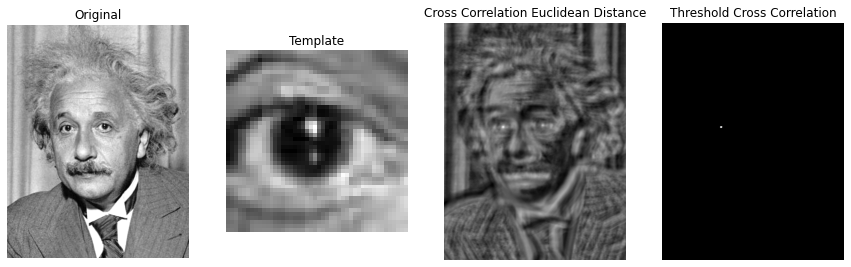

In [17]:
# Your solution here
einstein_br = io.imread("./images/einstein_br.png")
einstein_br = rgb2gray(einstein_br)

cross, th_cross = cross_correlation(einstein_br, eye, .65)

images = [einstein_br, eye,cross, th_cross]
titles = ['Original','Template', 'Cross Correlation Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

1.3 Display the results on `einstein_mask.png`:

<ipython-input-12-f94a637e11b3>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  einstein_mask = rgb2gray(einstein_mask)


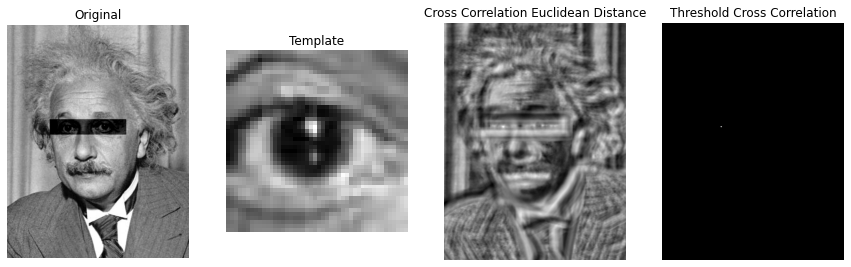

In [12]:
# Your solution here
einstein_mask = io.imread("images/einstein_mask.png")
einstein_mask = rgb2gray(einstein_mask)

cross, th_cross = cross_correlation(einstein_mask, eye, 0.55)

images = [einstein_mask, eye, cross, th_cross]
titles = ['Original', 'Template','Cross Correlation Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

1.4.
* How does the minimum distance between the template and the image change? 



* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

<ipython-input-19-656bb0695962>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  eye_br = rgb2gray(eye_br)


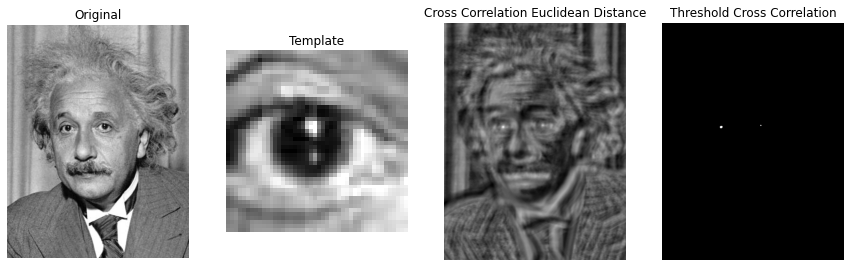

In [19]:
# Your solution here

eye_br = io.imread("images/eye_br.png")

eye_br = rgb2gray(eye_br)

cross, th_cross = cross_correlation(einstein, eye_br, 0.55)

images = [einstein, eye_br, cross, th_cross]
titles = ['Original', 'Template','Cross Correlation Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

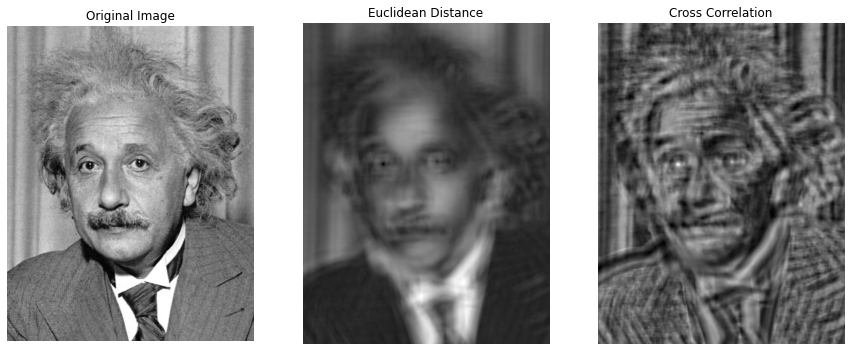

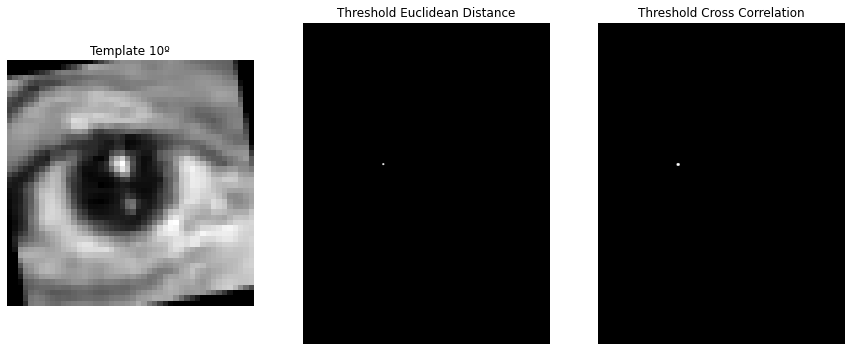

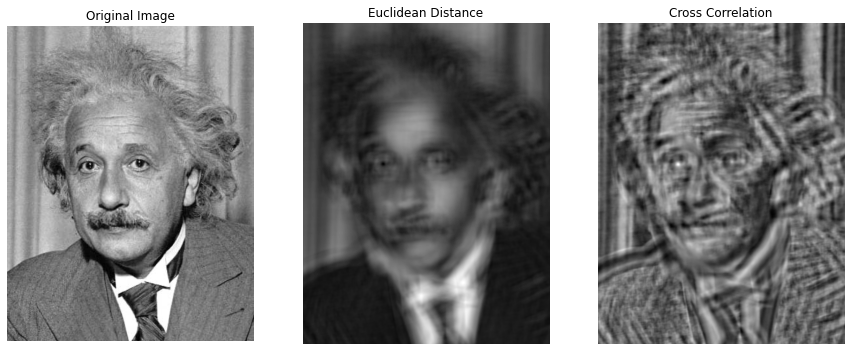

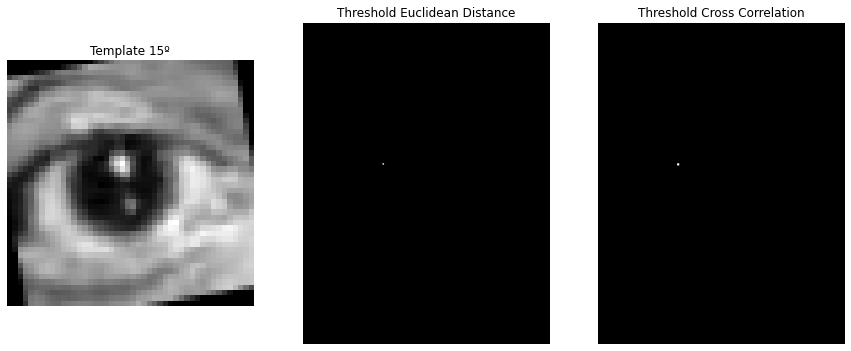

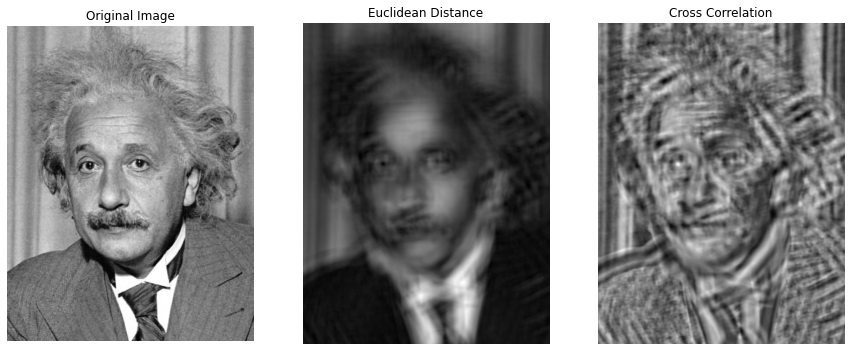

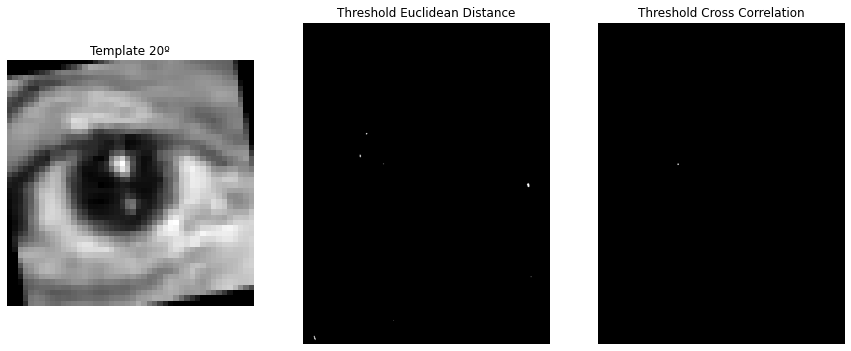

In [40]:
# Your solution here
eye_10=rotate(eye, 10)

euclidean, th_eucl = euclidean_distance(einstein, eye_10,9)
cross, th_cross = cross_correlation(einstein, eye_10, .47)

images = [einstein, euclidean, cross]
titles = ['Original Image', 'Euclidean Distance', 'Cross Correlation']

show_images(images, titles)

images = [eye_10, th_eucl, th_cross]
titles = ['Template 10º', 'Threshold Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

eye_15=rotate(eye, 15)

euclidean, th_eucl = euclidean_distance(einstein, eye_15,10)
cross, th_cross = cross_correlation(einstein, eye_15, .47)

images = [einstein, euclidean, cross]
titles = ['Original Image', 'Euclidean Distance', 'Cross Correlation']

show_images(images, titles)

images = [eye_10, th_eucl, th_cross]
titles = ['Template 15º', 'Threshold Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

eye_20=rotate(eye, 20)

euclidean, th_eucl = euclidean_distance(einstein, eye_20,10.58)
cross, th_cross = cross_correlation(einstein, eye_20, .47)

images = [einstein, euclidean, cross]
titles = ['Original Image', 'Euclidean Distance', 'Cross Correlation']

show_images(images, titles)

images = [eye_10, th_eucl, th_cross]
titles = ['Template 20º', 'Threshold Euclidean Distance', 'Threshold Cross Correlation']

show_images(images, titles)

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to object (person) detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'person_template.png' and the folder '/images/TestPersonImages/', apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

2.1. Read the template ('person_template.png'), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [ ]:
# Your solution here

2.2. Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [ ]:
# Your solution here

In [ ]:
# Your solution here

In [ ]:
# Your solution here

3.3. 
- Count on how many images were the persons detected correctly and discuss the failures. What do you think can be the reasons for the failures?
- Discuss what are the parameters of the HOG algorithm. Test several values of the parameters up to your criterion to show which are the optimal values for the person detection problem.
- Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1
(a) Detect the censure in the image `starbucks4.jpg`. 

(b) Analyze and discuss the effect of different values of the parameters in censure function.



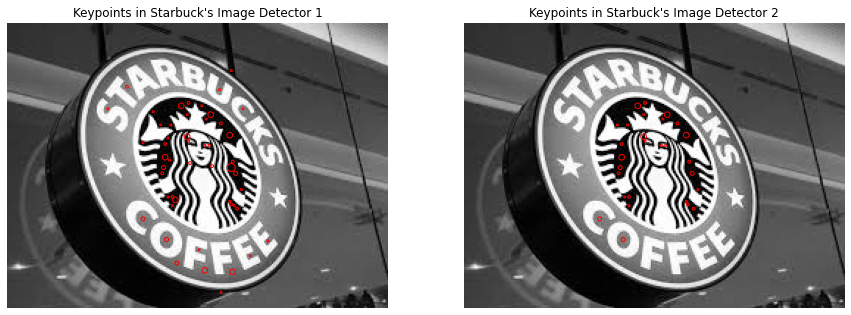

In [29]:
# Your solution here
starbucks = io.imread("images/starbucks4.jpg")
starbucks = rgb2gray(starbucks)

# Dettecting with censure function

'''
Comentar los diferentes parametros usados
'''
detector = CENSURE(non_max_threshold = .25, line_threshold=20)
detector.detect(starbucks)

detector2 = CENSURE(non_max_threshold = .3, line_threshold=10)
detector2.detect(starbucks)

fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(starbucks, cmap='gray')
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].axis('off')
ax[0].set_title("Keypoints in Starbuck's Image Detector 1")

ax[1].imshow(starbucks, cmap='gray')
ax[1].scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
              2 ** detector2.scales, facecolors='none', edgecolors='r')
ax[1].axis('off')
ax[1].set_title("Keypoints in Starbuck's Image Detector 2")

plt.show()

3.2 

(a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

(b) Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [44]:
# Image need to be in gray levels
def get_ORB(img,keypoints=20):
    descriptor_extractor = ORB(n_keypoints=keypoints)

    descriptor_extractor.detect_and_extract(img)
    keypoints = descriptor_extractor.keypoints
    descriptors = descriptor_extractor.descriptors
    
    return descriptors, keypoints

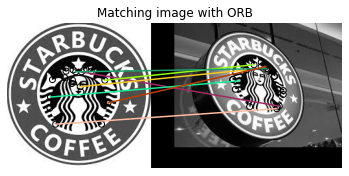

In [48]:
starbucks1 = io.imread("images/starbucks.jpg")
starbucks1 = rgb2gray(starbucks1)

starbucks2 = io.imread("images/starbucks4.jpg")
starbucks2 = rgb2gray(starbucks2)

dp1, kp1 = get_ORB(starbucks1)

dp2, kp2 = get_ORB(starbucks2)

matches = match_descriptors(dp1, dp2, cross_check=True)

plt.subplot()

plt.gray()

plot_matches(plt, starbucks1, starbucks2, kp1, kp2, matches)
plt.axis('off')
plt.title('Matching image with ORB')
plt.show()

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [79]:
# Your solution here
def match_images(model, images, keypoints):
    res = []
    
    desc = ORB(n_keypoints= keypoints)
    desc.detect_and_extract(model)
    model_kp = desc.keypoints
    model_dp = desc.descriptors
    
    for i in images:
        img = img_as_float(rgb2gray(i))
        
        desc = ORB(n_keypoints= keypoints)
        desc.detect_and_extract(img)
        
        kp = desc.keypoints
        dp = desc.descriptors
        
        matches = match_descriptors(model_dp, dp, cross_check=True)
        data = [model, img, model_kp, kp, matches]
        res.append(data)
    
    return res

def show_matches(matches):
    print(' Showing ', len(matches), ' matches')
    count = 1
    for match in matches:
        
        #Struct of plots
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))
        
        '''
        In matches 0 will be the model image,
        1 the image to match,
        2 keypoints from model,
        3 keypoints from image,
        4 the result from match_descriptors
        '''
        
        plot_matches(ax, match[0], match[1], match[2], match[3], match[4])
        ax.axis('off')
        ax.set_title('Match n ' + str(count))
        plt.show()
        
        count += 1        
        

<ipython-input-74-988c7b316f14>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = img_as_float(rgb2gray(i))


 Showing  6  matches


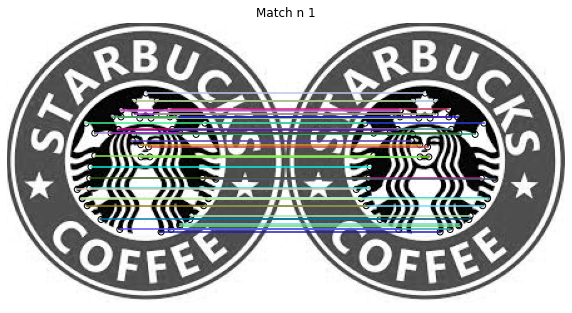

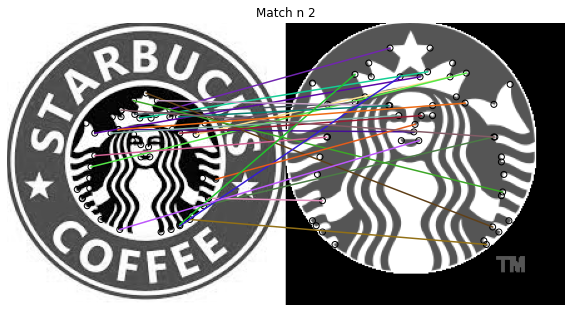

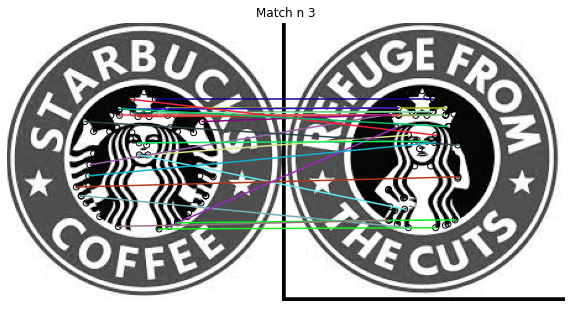

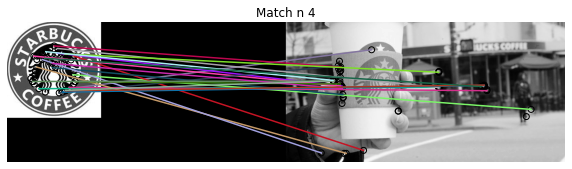

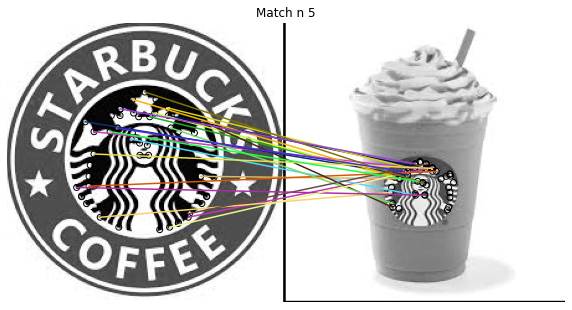

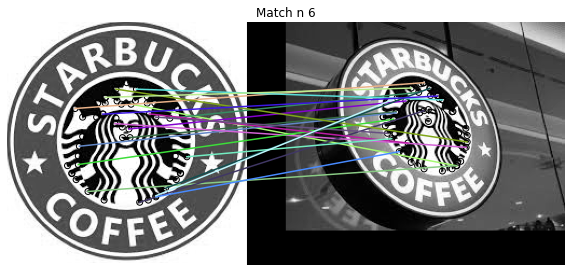

In [78]:
images = io.ImageCollection('images/starbucks*')
model = io.imread("images/starbucks.jpg")
model = rgb2gray(model)

matches = match_images(model, images, 50)

matches.sort(key=lambda x:len(x[4]), reverse=True)

show_matches(matches)


3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

<ipython-input-79-988c7b316f14>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = img_as_float(rgb2gray(i))


 Showing  6  matches


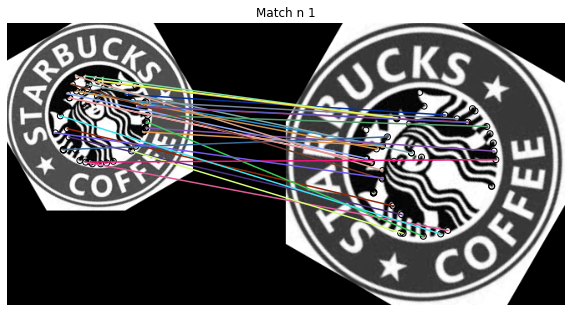

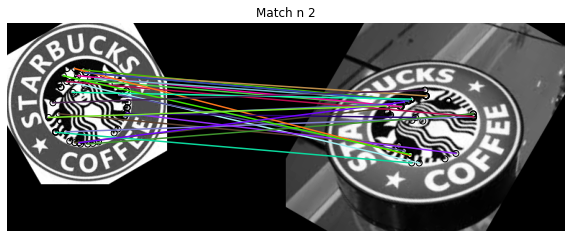

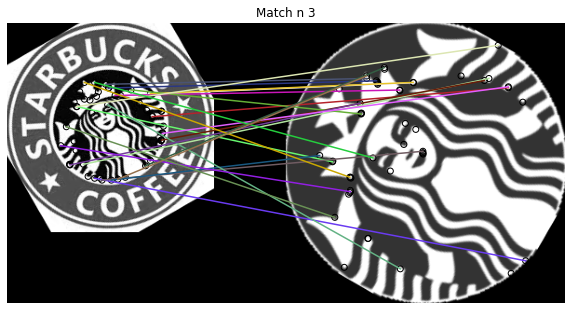

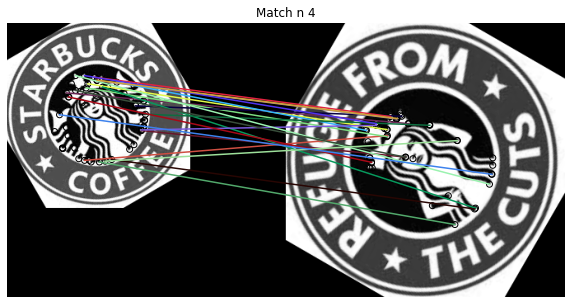

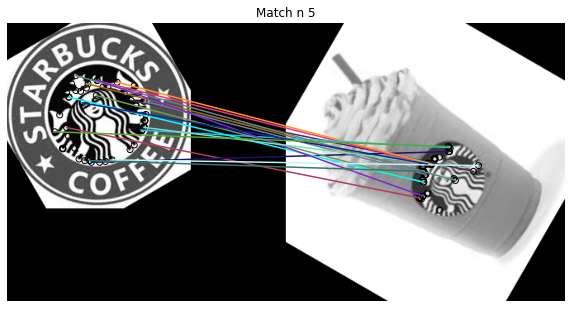

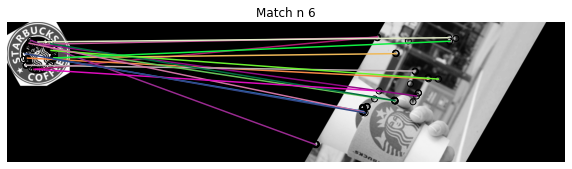

In [84]:
# Your solution here
images = io.ImageCollection('images/starbucks*')

model = io.imread("images/starbucks.jpg")
model = rgb2gray(model)

model = rotate(model, 30)

aux = []
for item in images:
    item = rescale(item, 1.5)
    item = rotate(item, 60)
    aux.append(item)

matches = match_images(model, aux, 50)

matches.sort(key=lambda x:len(x[4]), reverse=True)

show_matches(matches)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



<ipython-input-85-9197e53430ba>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  model = rgb2gray(model)
<ipython-input-79-988c7b316f14>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = img_as_float(rgb2gray(i))


 Showing  7  matches


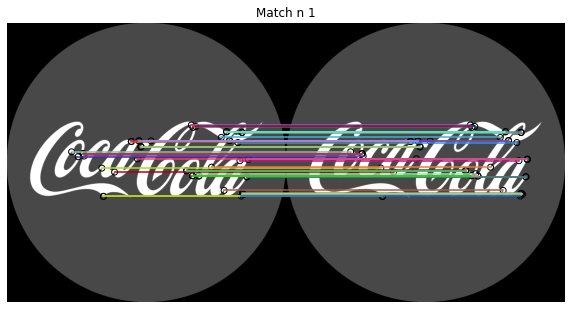

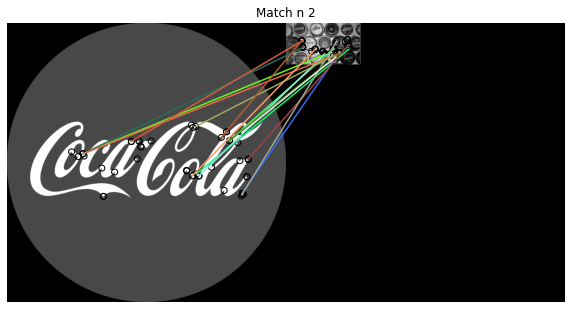

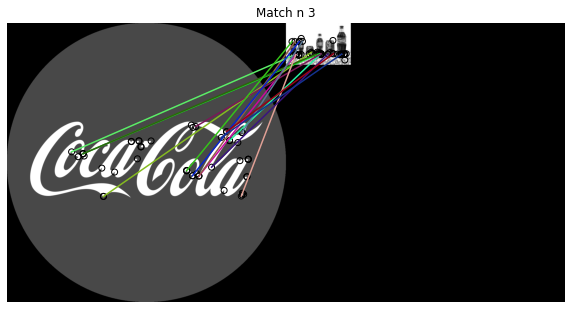

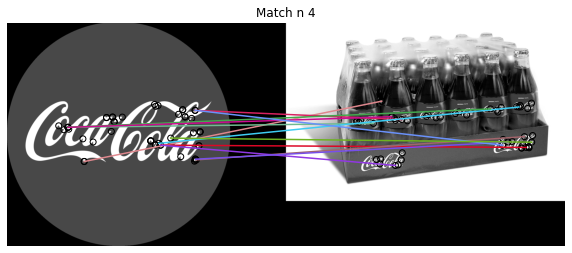

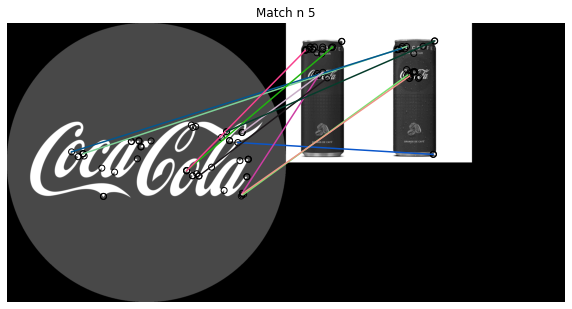

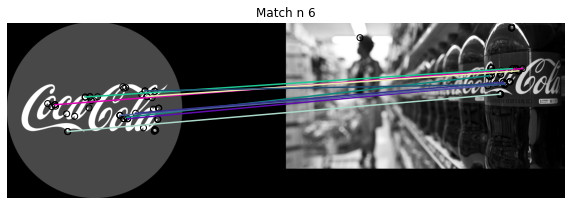

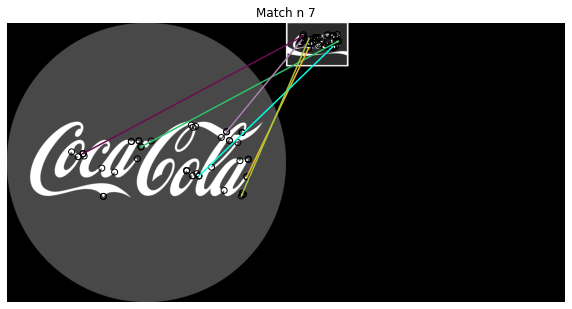

In [85]:
images = io.ImageCollection('images/CocaColaImages/cocacola*')
model = io.imread("images/CocaColaImages/cocacola_logo.png")
model = rgb2gray(model)

matches = match_images(model, images, 50)

matches.sort(key=lambda x:len(x[4]), reverse=True)

show_matches(matches)

3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

In [ ]:
# Your solution here

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)